# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly
# from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [86]:
#os.getcwd()

# 1.1 Reading Data

<h4><font color='red'>**Only 4000 data is used in this assignment while ploting TSNE due to memory constrain.Hence conclusion are based on that data.**</font></h4>

In [4]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('='*50)
print("Number of data points in resource data", resource_data.shape)
print('='*50)
print("The attributes of data :", project_data.columns.values)
print('='*50)
print(type(project_data))

Number of data points in train data (109248, 17)
Number of data points in resource data (1541272, 4)
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
<class 'pandas.core.frame.DataFrame'>


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects that are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects that are not approved for funding  16542 , ( 15.141695957820739 %)


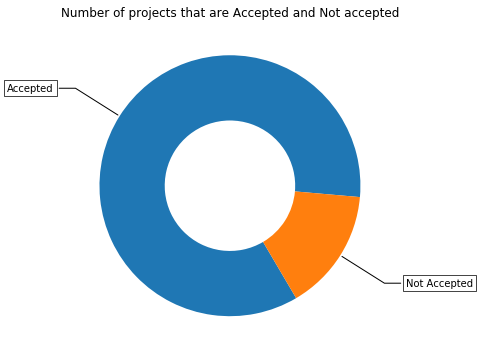

In [7]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects that are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects that are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-5)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of projects that are Accepted and Not accepted")

plt.show()

**SUMMARY:** Overall Project accept rate for funding is high.

### 1.2.1 Univariate Analysis: School State

In [8]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [9]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


**SUMMARY:** States such as ND,DE,WA are having 100% approval rate where as VT,DC states have very low approval rate when compare to other states.

In [10]:
# stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects approved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [11]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

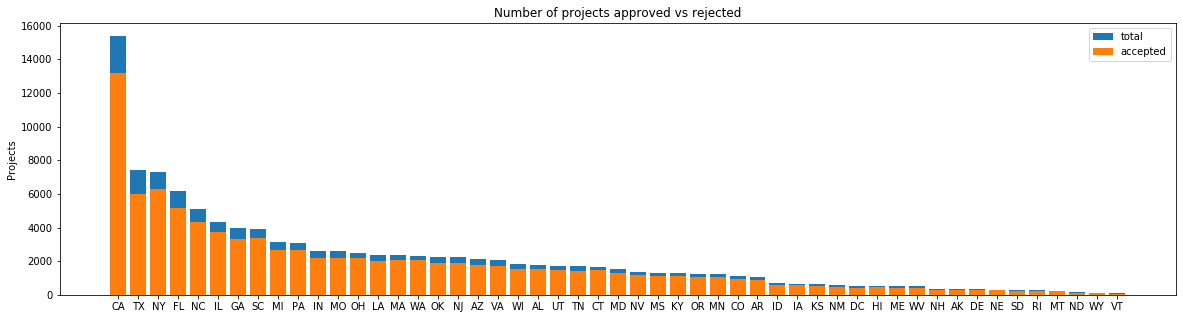

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [12]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

**SUMMARY:** From the above plot we can see total no of project submitted by the school vs project approval rate.Seems CA,TX and NY have submitted more project compare to others school state.Out of that CA having 85% approval rate.
School state VT,WY,ND have submitted the less no of project out of that ND having 88% approval rate.

### 1.2.2 Univariate Analysis: teacher_prefix

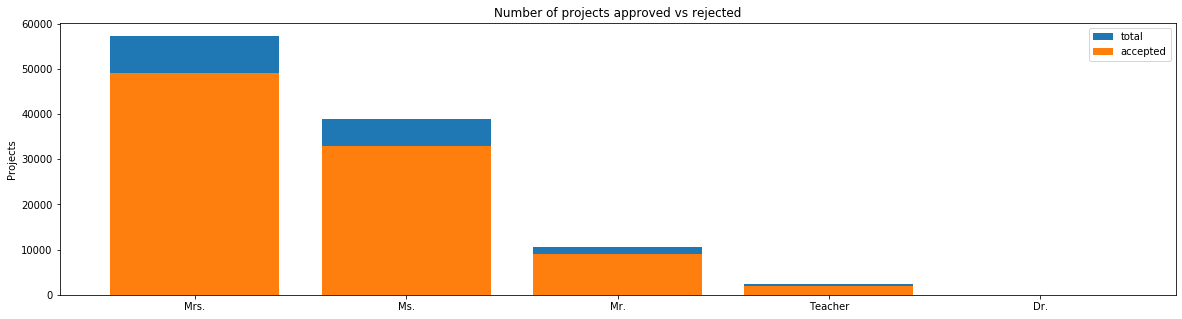

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [13]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

**SUMMARY:**
More number of projects were submitted by the Teacher prefix (Mrs) and project approval rate also 85%.
Very low number of projects were submitted by Teacher prefix (Dr).

### 1.2.3 Univariate Analysis: project_grade_category

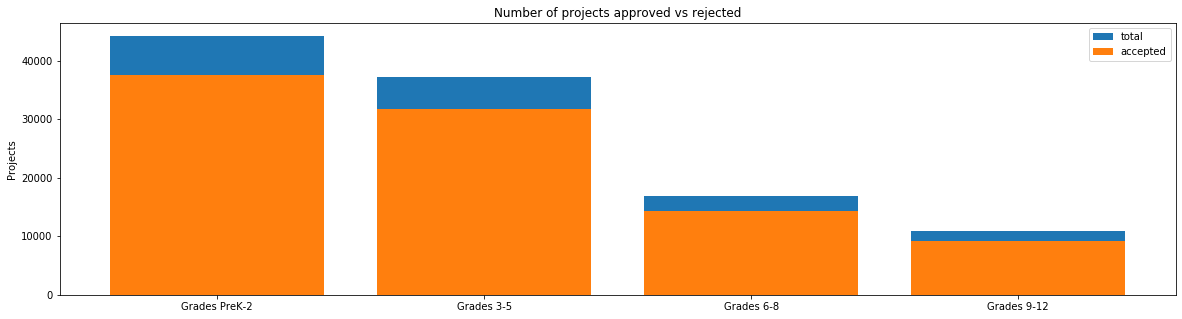

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [14]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**SUMMARY:**
    1.Project Approval rate for Grade 3-5 is high when compare to the other Grades.
    2.More projects approval request are coming for Grades PreK-2.

### 1.2.4 Univariate Analysis: project_subject_categories

In [15]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            #print(j)
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
        #print(temp)
    cat_list.append(temp.strip())
#print(cat_list)

In [16]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

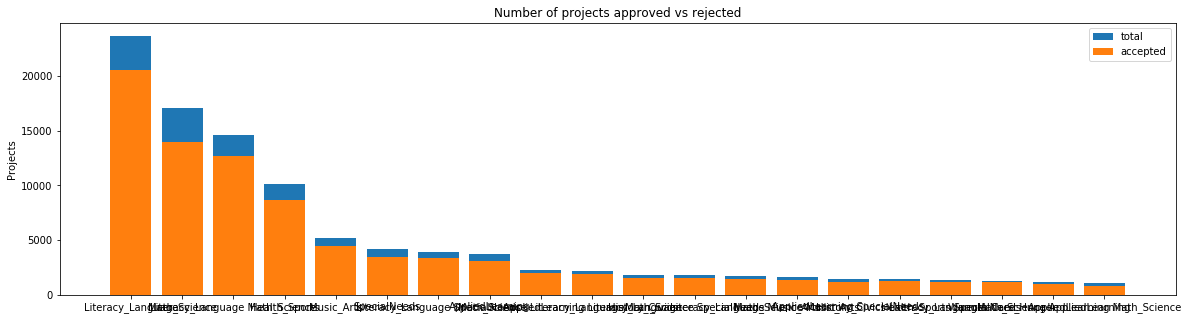

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [17]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

**SUMMARY:**
High projects were submitted under categories "Literacy_Language Math_Science","Literacy_Language","Music_Arts" out of that 86% of projects were approved under categorie "Literacy_Language Math_Science".
Whereas low no of projects were submitted under categories "AppliedLearning Math_Science","Math_Science AppliedLearning","Warmth Care_Hunger" out of that 92% of projects were approved under the categorie under "Warmth Care_Hunger".

In [18]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

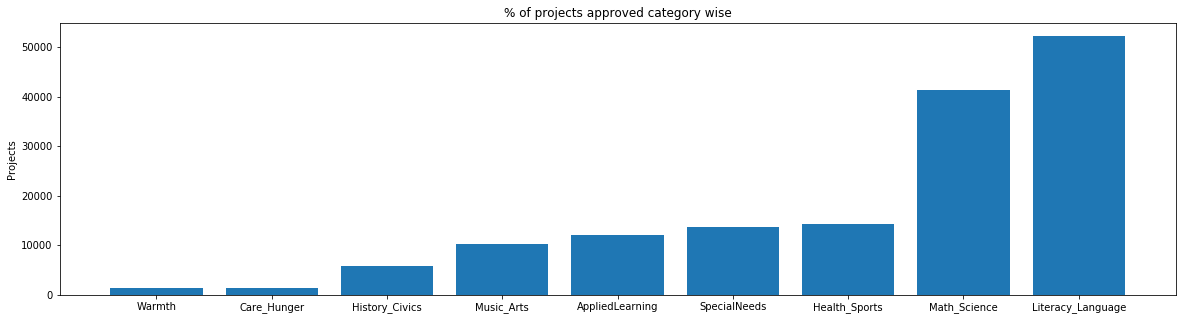

In [19]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects approved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

**SUMMARY:**
    1.Project approved category under Warmth and Care_Hunger are low.
    2.Project approved category under Math_Science and Literacy_Language are high.

In [20]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [21]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [22]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

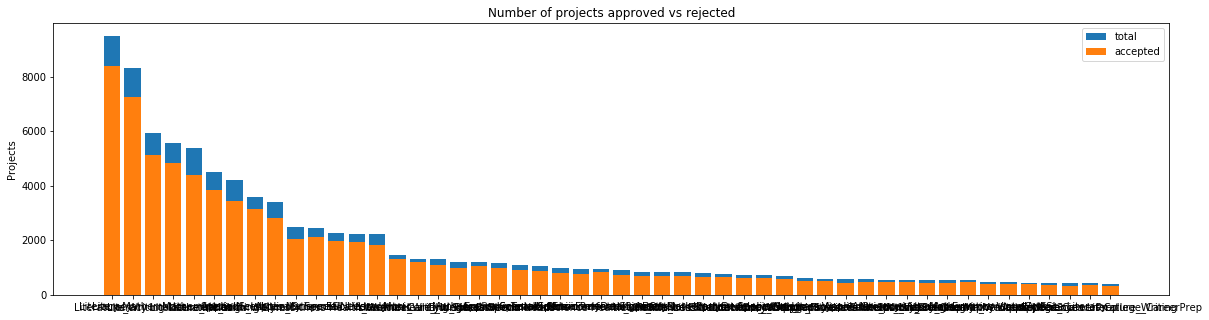

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [23]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [24]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

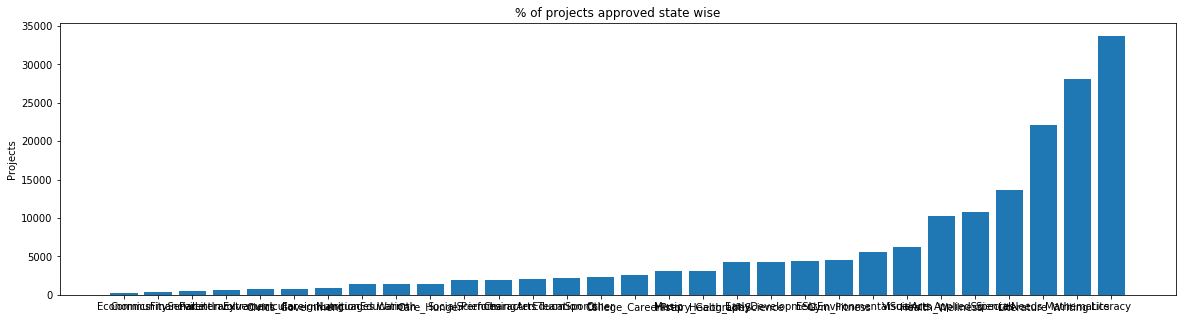

In [25]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects approved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [26]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

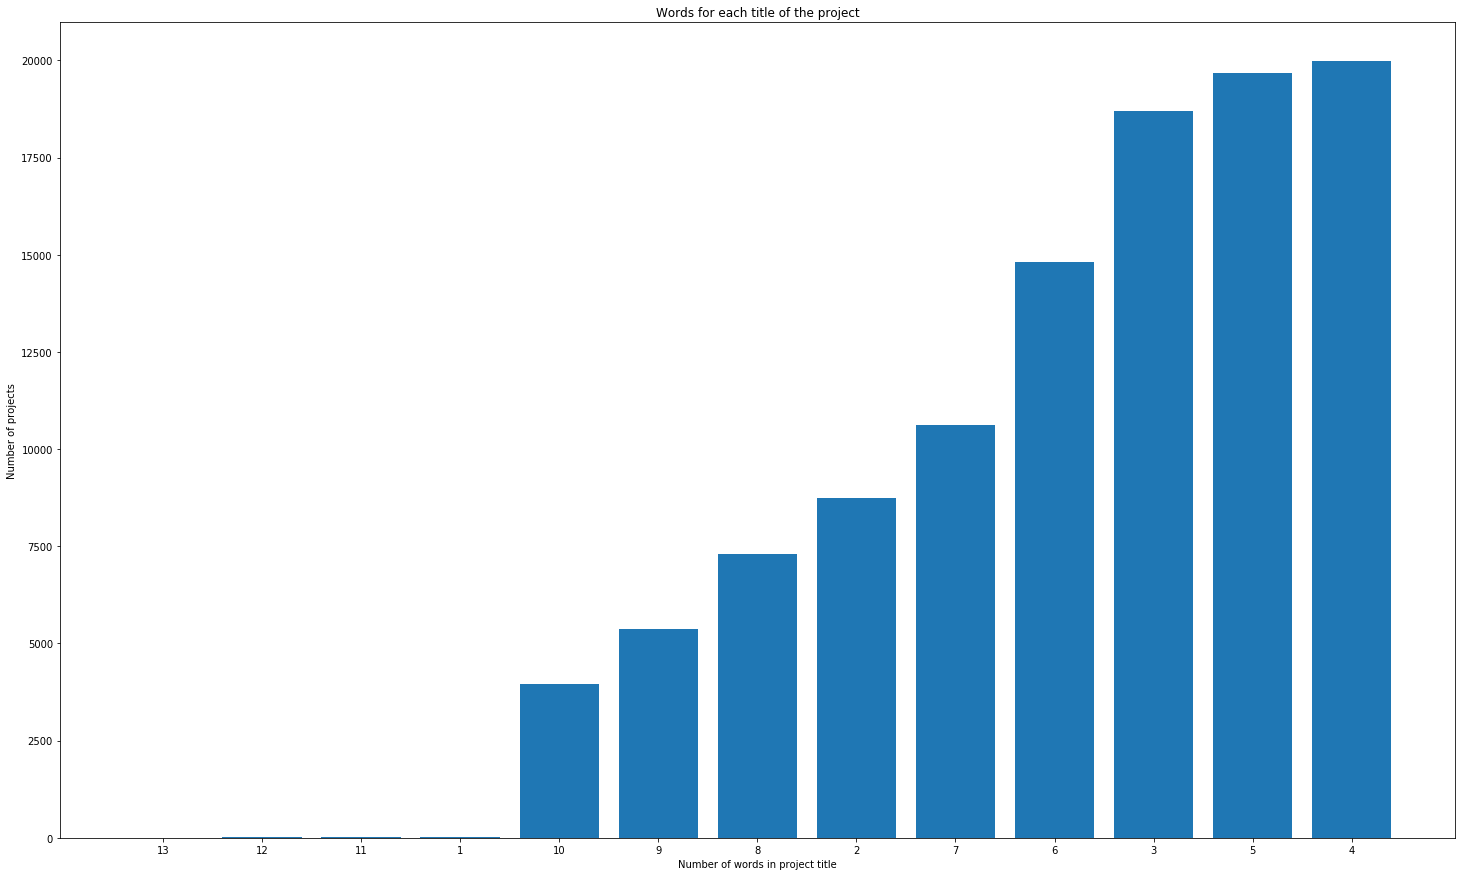

In [27]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
#https://stackoverflow.com/questions/4804005/matplotlib-figure-facecolor-background-color
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


wrd = np.arange(len(word_dict))
plt.figure(figsize=(25,15),edgecolor='black')
p1 = plt.bar(wrd, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in project title')
plt.title('Words for each title of the project')
plt.xticks(wrd, list(word_dict.keys()))
plt.show()

**SUMMARY:**
More than 2000 projects title is having the 4-5 words.It shows most project titles are short and chrisp, also they are more specfic.

In [28]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

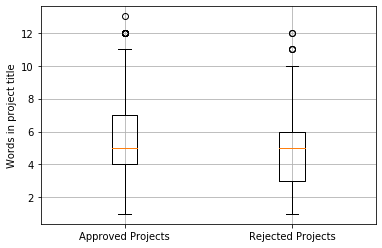

In [29]:
#https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

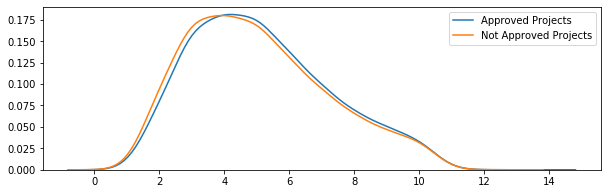

In [30]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [31]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)
print(type(project_data["essay"]))

<class 'pandas.core.series.Series'>


In [32]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
# print(approved_word_count)
approved_word_count = approved_word_count.values
# print(approved_word_count)
rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

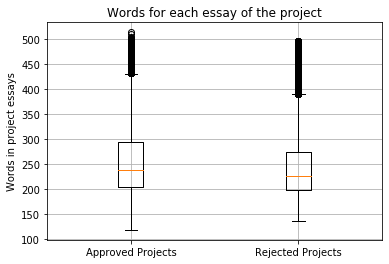

In [33]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

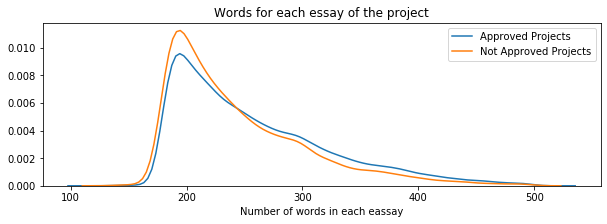

In [34]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [35]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [36]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [37]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [38]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

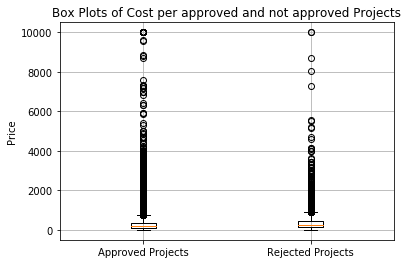

In [39]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

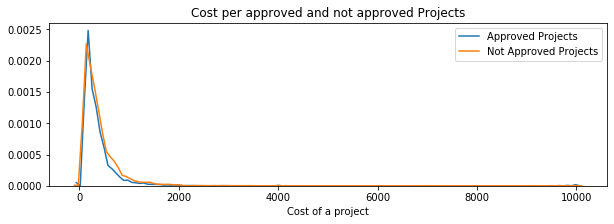

In [40]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [41]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

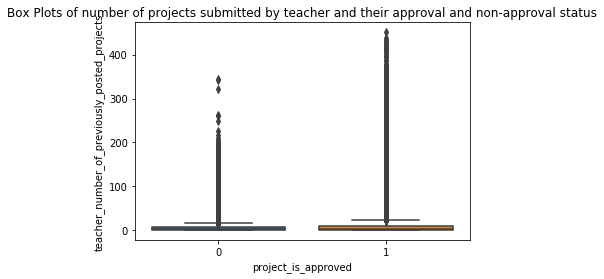

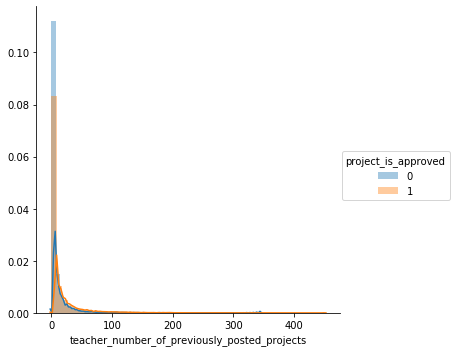

+-----------------------------------------+-------------------+-----------------------+
| Number of projects submitted by teacher | Approved Projects | Not Approved Projects |
+-----------------------------------------+-------------------+-----------------------+
|                    0                    |        0.0        |          0.0          |
|                    5                    |        0.0        |          0.0          |
|                    10                   |        0.0        |          0.0          |
|                    15                   |        0.0        |          0.0          |
|                    20                   |        0.0        |          1.0          |
|                    25                   |        0.0        |          1.0          |
|                    30                   |        1.0        |          1.0          |
|                    35                   |        1.0        |          1.0          |
|                    40         

In [42]:
# we get the teacher's previously posted project data using train_data.csv file
warnings.filterwarnings("ignore")
new = project_data[['teacher_number_of_previously_posted_projects','project_is_approved']]
pp = new['teacher_number_of_previously_posted_projects']
pa = new['project_is_approved']
pp=pp.values
pa=pa.values

#print(pp)
#print(pa)

# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='project_is_approved',y='teacher_number_of_previously_posted_projects', data=new)
plt.title('Box Plots of number of projects submitted by teacher and their approval and non-approval status')
plt.show()

# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# https://www.tutorialspoint.com/seaborn/seaborn_facet_grid.htm
sns.FacetGrid(new, hue="project_is_approved", size=5).map(sns.distplot, "teacher_number_of_previously_posted_projects").add_legend();
plt.show();

x = PrettyTable()
x.field_names = ["Number of projects submitted by teacher", "Approved Projects", "Not Approved Projects"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(pp,i), 3), np.round(np.percentile(pa,i), 3)])
print(x)


**Observation:** According to the above analysis the box plot and the PDF doesnot give much information but from the pretty table(percentile values) we can gather that as the number of Teacher's previously posted projects increase their approval rate is also getting increased, the rate of not getting approved is lower.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 151743.98it/s]


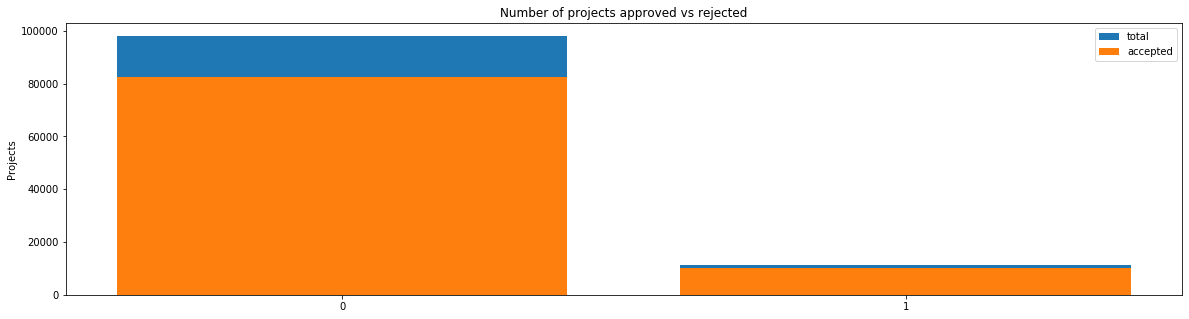

   number_in_summary  project_is_approved  total       Avg
0                  0                82563  98012  0.842376
1                  1                10143  11236  0.902723
   number_in_summary  project_is_approved  total       Avg
0                  0                82563  98012  0.842376
1                  1                10143  11236  0.902723


In [43]:
# https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-default-value
import pdb
s1 = {}
s2 = {}
l1 = []
v = range(len(pp))
def Numbers(pp):
    for j in tqdm(v):
        for k in pp[j].split():
            # pdb.set_trace()
            if k.isdigit():
                s1[j] = int(k)
def form_list():
    for x in v:
        if x in s1.keys():
            s2[x] = s1[x]
        else:
            s2[x] = 0
def number_conversion():
    for r in s2.values():
        if r == 0:
            l1.append(0)
        else:
            l1.append(1)

pp = []
for i in project_data['project_resource_summary']:
    pp.append(i)

Numbers(pp)
form_list()
number_conversion()

# len(s2)
project_data['number_in_summary'] = l1
univariate_barplots(project_data, 'number_in_summary', 'project_is_approved', top=2)


**OBSERVATION:**
Project Resource Summary column of DonorsChose[Train] data seems to be affecting the both acceptance and rejection of project.
From the above plot we can seen 90% of the total project with numerical presents are got approved. Hence this shows that we might have a chance of project to get approved, if we have numerical.
Hence we can say Project resource summary column data is useful to classifing whether a give project will be approved or not.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [44]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2        ...          \
0  \"The limits of your language are the limits o...        ...           
1  The projector we need for our school is very c...        ...           

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   number_in_summary  
0                  0  
1                  0  

[2 rows x 21 columns]

In [45]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[999])
#print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [46]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
sent = decontracted(project_data['essay'].values[49])
print(sent)
print("="*50)

Located in the Bay Area, our city is a melting pot of diversity and culture and our school is home to amazing students who enjoy and embrace each other. With a variety of excited and motivated learners, our class is dedicated to implementing more science and technology into the classroom. \r\n\r\nStudents are eager to learn new science curriculum as well as develop skills and strategies to make them better readers. In the classroom, students are full of energy, positivity, and confidence. They enjoy learning new things, especially topics related to science. They are inquisitive and determined, and as an educator, I intend to continue nurturing this drive. As an enthusiastic and energetic educator, I am looking forward to helping my students reach for the stars, theoretically and literally!My students enjoy being active outside as well as inside the classroom, and Rainy Day Recess will not stop them from being active! They have requested to participate in regular activities that get the

In [48]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Located in the Bay Area, our city is a melting pot of diversity and culture and our school is home to amazing students who enjoy and embrace each other. With a variety of excited and motivated learners, our class is dedicated to implementing more science and technology into the classroom.     Students are eager to learn new science curriculum as well as develop skills and strategies to make them better readers. In the classroom, students are full of energy, positivity, and confidence. They enjoy learning new things, especially topics related to science. They are inquisitive and determined, and as an educator, I intend to continue nurturing this drive. As an enthusiastic and energetic educator, I am looking forward to helping my students reach for the stars, theoretically and literally!My students enjoy being active outside as well as inside the classroom, and Rainy Day Recess will not stop them from being active! They have requested to participate in regular activities that get them up

In [49]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Located in the Bay Area our city is a melting pot of diversity and culture and our school is home to amazing students who enjoy and embrace each other With a variety of excited and motivated learners our class is dedicated to implementing more science and technology into the classroom Students are eager to learn new science curriculum as well as develop skills and strategies to make them better readers In the classroom students are full of energy positivity and confidence They enjoy learning new things especially topics related to science They are inquisitive and determined and as an educator I intend to continue nurturing this drive As an enthusiastic and energetic educator I am looking forward to helping my students reach for the stars theoretically and literally My students enjoy being active outside as well as inside the classroom and Rainy Day Recess will not stop them from being active They have requested to participate in regular activities that get them up and moving throughout

In [50]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [51]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:31<00:00, 1194.19it/s]


In [52]:
# after preprocesing
preprocessed_essays[999]

'welcome spectacular 1st 2nd grade ell classroom i amazing class motivated second language learners these youngsters come homes hardworking families support education the students along parents want succeed place value well school however life challenges seem make difficult many families school each day students come class eager start day learn my classroom brings much stability ongoing support not always get home our typical day includes hands experiences cooperative learning plenty opportunities success i want student feel like classroom safe happy place it hope student develops lifelong love learning our title 1 school community works hard toward goals student success growth student engagement key success learning my first second graders often struggle ability focus pay attention they need opportunity extra movement allow brains alert attentive i would like provide tools help relieve stress reduce anxiety relax having tools like balance balls wobble cushions squishy fidget balls pro

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [53]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

preprocessed_titles[998]


100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 25319.93it/s]


'super students need super supplies success second grade'

**OBSERVATION:**
Project tile column of the train.csv data has been preprocessed in the same method as we done for Project Essay.

## 1. 4 Preparing data for models

In [54]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'number_in_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [55]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [56]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay

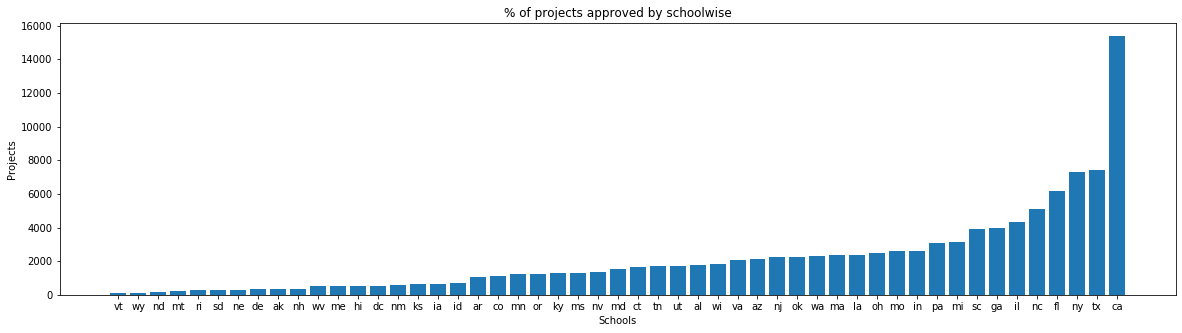

vt                   :        80
wy                   :        98
nd                   :       143
mt                   :       245
ri                   :       285
sd                   :       300
ne                   :       309
de                   :       343
ak                   :       345
nh                   :       348
wv                   :       503
me                   :       505
hi                   :       507
dc                   :       516
nm                   :       557
ks                   :       634
ia                   :       666
id                   :       693
ar                   :      1049
co                   :      1111
mn                   :      1208
or                   :      1242
ky                   :      1304
ms                   :      1323
nv                   :      1367
md                   :      1514
ct                   :      1663
tn                   :      1688
ut                   :      1731
al                   :      1762
wi        

In [57]:
project_data = pd.read_csv('train_data.csv')
sch1_catogories = list(project_data['school_state'].values)
school_list = []
for sent in sch1_catogories:
    school_list.append(sent.lower().strip())
project_data['school_categories'] = school_list
project_data.drop(['school_state'], axis=1, inplace=True)
print(project_data.head(2))

# Count of words in corpus python: 
#https://stackoverflow.com/questions/8139239/how-to-count-words-in-a-corpus-document
my_counter_sch = Counter()
for word in project_data['school_categories'].values:
    my_counter_sch.update(word.split())

# dict sort by value: 
#https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values
sch_dict = dict(my_counter_sch)
sorted_sch_dict = dict(sorted(sch_dict.items(), key=lambda kv: kv[1]))


ind1 = np.arange(len(sorted_sch_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind1, list(sorted_sch_dict.values()))
plt.xlabel('Schools')
plt.ylabel('Projects')
plt.title('% of projects approved by schoolwise')
plt.xticks(ind1, list(sorted_sch_dict.keys()))
plt.show()

for i, j in sorted_sch_dict.items():
    print("{:20} :{:10}".format(i,j))

vectorizer = CountVectorizer(vocabulary=list(sorted_sch_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_categories'].values)
print(vectorizer.get_feature_names())

sch_one_hot = vectorizer.transform(project_data['school_categories'].values)
print("Shape of the matrix after one hot encodig ",sch_one_hot.shape)

**OBSERVATION:**
The "school_state" column has been preprocessed to get the words in lowercase under new column name "school_categories".

In [58]:
project_data = pd.read_csv('train_data.csv')
# Remove special characters from list of strings python: 
#https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
prefix_catogories = list(project_data['teacher_prefix'].values)
prefix_list = []
for sent in prefix_catogories:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    sent = ' '.join(e for e in sent.split())
    prefix_list.append(sent.lower().strip())
project_data['prefix_catogories'] = prefix_list

   Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 pro

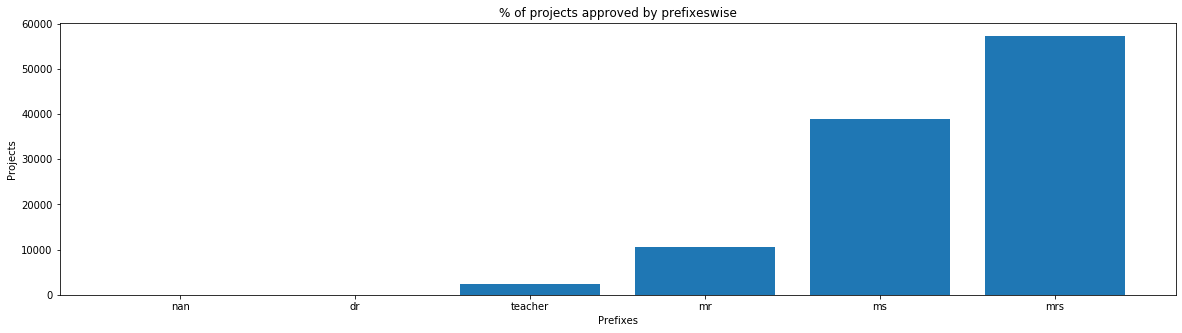

nan                  :         3
dr                   :        13
teacher              :      2360
mr                   :     10648
ms                   :     38955
mrs                  :     57269
['nan', 'dr', 'teacher', 'mr', 'ms', 'mrs']
Shape of the matrix after one hot encodig  (109248, 6)


In [59]:
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
print(project_data.head(2))

# Count of words in corpus python: 
#https://stackoverflow.com/questions/8139239/how-to-count-words-in-a-corpus-document

my_counter_prefix = Counter()
for word in project_data['prefix_catogories'].values:
    my_counter_prefix.update(word.split())

# dict sort by value: 
#https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values

prefix_dict = dict(my_counter_prefix)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))


ind2 = np.arange(len(sorted_prefix_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind2, list(sorted_prefix_dict.values()))
plt.xlabel('Prefixes')
plt.ylabel('Projects')
plt.title('% of projects approved by prefixeswise')
plt.xticks(ind2, list(sorted_prefix_dict.keys()))
plt.show()

for i, j in sorted_prefix_dict.items():
    print("{:20} :{:10}".format(i,j))

vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['prefix_catogories'].values)
print(vectorizer.get_feature_names())

prefix_one_hot = vectorizer.transform(project_data['prefix_catogories'].values)
print("Shape of the matrix after one hot encodig ",prefix_one_hot.shape)

**OBSERVATION:**
The "teacher_prefix" column has been preprocessed to get the words in lowercase under new column name "prefix_catogories".

   Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime         project_subject_categories  \
0           IN        2016-12-05 13:43:57                Literacy & Language   
1           FL        2016-10-25 09:22:10  History & Civics, Health & Sports   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The

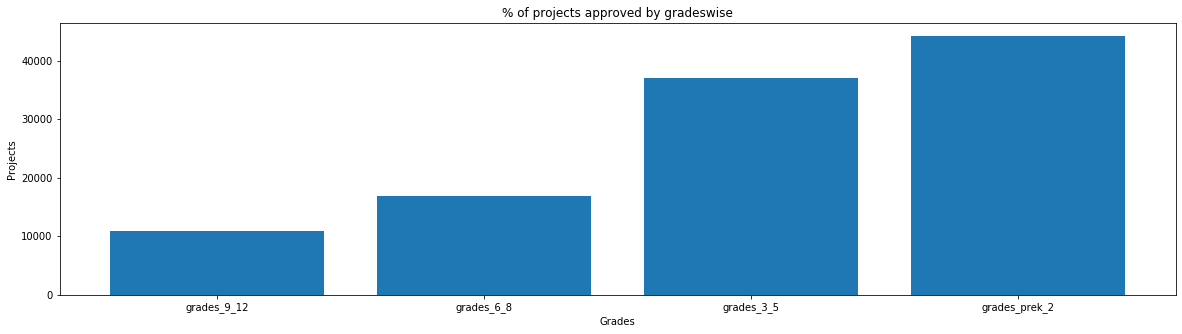

grades_9_12          :     10963
grades_6_8           :     16923
grades_3_5           :     37137
grades_prek_2        :     44225
['grades_9_12', 'grades_6_8', 'grades_3_5', 'grades_prek_2']
Shape of the matrix after one hot encodig  (109248, 4)


In [60]:
project_data = pd.read_csv('train_data.csv')
grade_catogories = list(project_data['project_grade_category'].values)
# Remove special characters from list of strings python: 
#https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
grade_list = []
for sent in grade_catogories:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    sent = ' '.join(e for e in sent.split())
    grade_list.append(sent.lower().strip())

project_data['new_grade_category'] = grade_list

project_data.drop(['project_grade_category'], axis=1, inplace=True)
print(project_data.head(2))

# Count of words in corpus python: 
#https://stackoverflow.com/questions/8139239/how-to-count-words-in-a-corpus-document

my_counter_grade = Counter()
for word in project_data['new_grade_category'].values:
    my_counter_grade.update(word.split())

# dict sort by value: 
#https://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values

grade_dict = dict(my_counter_grade)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))


ind3 = np.arange(len(sorted_grade_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind3, list(sorted_grade_dict.values()))
plt.xlabel('Grades')
plt.ylabel('Projects')
plt.title('% of projects approved by gradeswise')
plt.xticks(ind3, list(sorted_grade_dict.keys()))
plt.show()

for i, j in sorted_grade_dict.items():
    print("{:20} :{:10}".format(i,j))

vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['new_grade_category'].values)
print(vectorizer.get_feature_names())

grade_one_hot = vectorizer.transform(project_data['new_grade_category'].values)
print("Shape of the matrix after one hot encodig ",grade_one_hot.shape)

**OBSERVATION:**
Replacing the '' and '-' with '_' to convert the grades into the single whole word.
The "project_grade_category" column has been preprocessed to get the words in lowercase under new column name "new_grade_category".

### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [62]:
# Similarly you can vectorize for title also
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix (TITLE) after one hot encoding ",title_bow.shape)

Shape of matrix (TITLE) after one hot encoding  (109248, 3329)


#### 1.4.2.3 TFIDF vectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encoding ",text_tfidf.shape)

Shape of matrix after one hot encoding  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [64]:
# Similarly you can vectorize for title also
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix(TITLE) after one hot encoding ",title_tfidf.shape)

Shape of matrix(TITLE) after one hot encoding  (109248, 3329)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [65]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



'''
# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================
'''

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the corpus", len(words))
words = set(words)
print("the unique words in the corpus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our corpus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_corpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_corpus[i] = model[i]
print("word 2 vec length", len(words_corpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus, f)


Loading Glove Model


1427032it [06:08, 3875.52it/s]


Done. 1427032  words loaded!
all the words in the corpus 17014413
the unique words in the corpus 58968
The number of words that are present in both glove vectors and our corpus 50725 ( 86.021 %)
word 2 vec length 50725


In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [67]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:03<00:00, 884.98it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [68]:
# Similarly you can vectorize for title also
# compute average word2vec for each title.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title.append(vector_title)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:50<00:00, 2182.14it/s]


109248
300


**OBSERVATION:**
PreProcessed_titles data column has been vectorized using GloveWords,Average word to vector models.

#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [69]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [70]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:39<00:00, 237.99it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [71]:
# Similarly you can vectorize for title also
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

# compute tfidf word2vec for each title.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector_title)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:59<00:00, 1826.44it/s]


109248
300


**OBSERVATION:**
PreProcessed_titles data column has been vectorized using GloveWords,TFIDF weighted word to vector models.

### 1.4.3 Vectorizing Numerical features

In [72]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler


#price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#print(price_data)
project_data = pd.merge(project_data, price_data, on='id', how='left')
#print(project_data)
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [73]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [74]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
previously_posted_projects_scalar = StandardScaler()
previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_projects_standardized = previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [75]:
previously_posted_projects_standardized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

**OBSERVATION:**
The "teacher_number_of_previously_posted_projects" data is numerical feature and that has been vectorized using the StandardScalar and scaling it to unit variance.

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [76]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [77]:
print(title_bow.shape)
print(grade_one_hot.shape)
print(prefix_one_hot.shape)
print(sch_one_hot.shape)
print(previously_posted_projects_standardized.shape)

(109248, 3329)
(109248, 4)
(109248, 6)
(109248, 51)
(109248, 1)


In [78]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

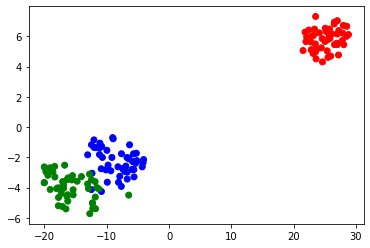

In [83]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [79]:
### please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
Y1 = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,title_bow, grade_one_hot, prefix_one_hot, sch_one_hot, previously_posted_projects_standardized))
Y1.shape
type(Y1)


scipy.sparse.coo.coo_matrix

<h4><font color='red'>**Only 4000 data is used in this assignment while ploting TSNE due to memory constrain.Hence conclusion are based on that data.**</font></h4>

In [80]:
from sklearn.manifold import TSNE
Y1 = Y1.tocsr()
N1 = Y1[0:4000,:]
#type(N1)
#N1.shape

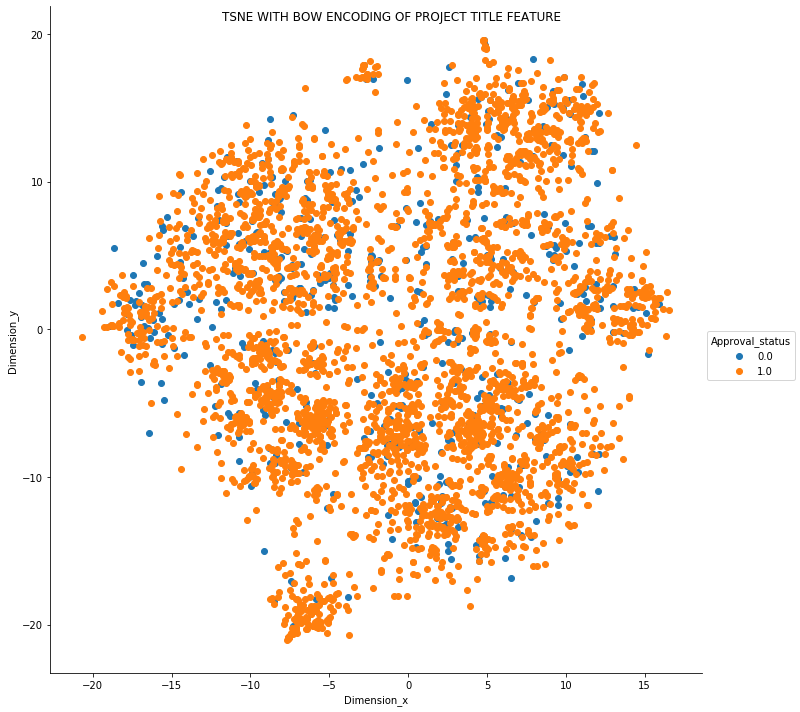

In [81]:
# https://scikit-learn.org/stable/modules/impute.html
#https://docs.scipy.org/doc/scipy/reference/sparse.html
#https://sparse.pydata.org/en/latest/generated/sparse.COO.tocsr.html

import scipy.sparse as sp
from sklearn.impute import SimpleImputer
# X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
#imp = SimpleImputer(missing_values=np.nan, strategy='median')
#imp.fit(Y1)                  
#SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='median', verbose=0)
#N1 = imp.transform(Y1)
N1 = N1.toarray()
# print(type(N1))
# print(N1)

tsne = TSNE(n_components=2, perplexity=180, learning_rate=200, random_state = 0)
N1_embedding = tsne.fit_transform(N1)

# print(Y_embedding)

# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
t = project_data['project_is_approved']
t1=t[0:4000]
# print(type(t1))


for_tsne1 = np.vstack((N1_embedding.T, t1)).T
for_tsne1_df = pd.DataFrame(data=for_tsne1, columns=['Dimension_x','Dimension_y','Approval_status'])
sns.FacetGrid(for_tsne1_df, hue = "Approval_status", size = 10).map(plt.scatter, "Dimension_x", "Dimension_y").add_legend().fig.suptitle("TSNE WITH BOW ENCODING OF PROJECT TITLE FEATURE ")
plt.show()


<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

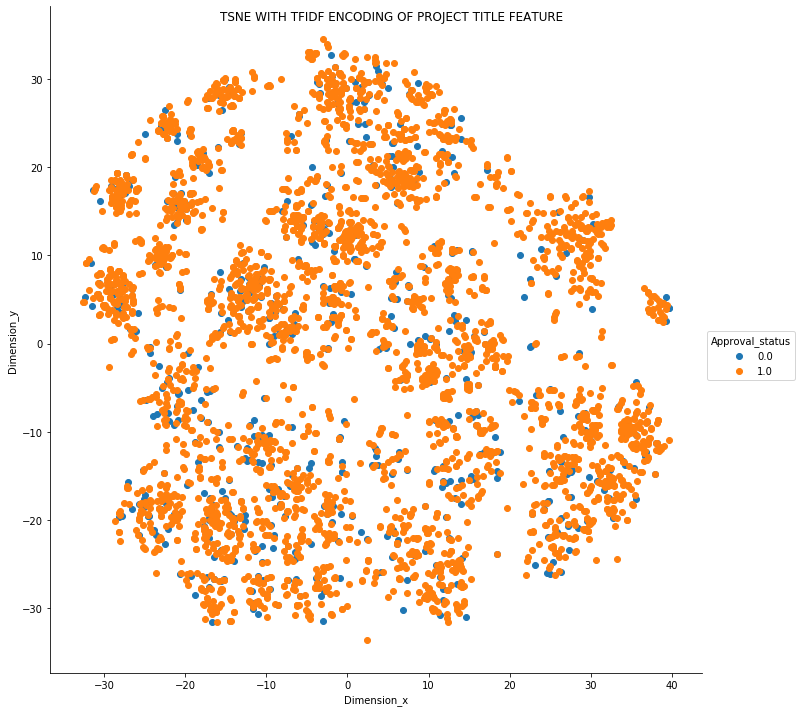

In [82]:
# https://scikit-learn.org/stable/modules/impute.html
#https://docs.scipy.org/doc/scipy/reference/sparse.html
#https://sparse.pydata.org/en/latest/generated/sparse.COO.tocsr.html

import scipy.sparse as sp
from sklearn.impute import SimpleImputer
# X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])

Y_tf = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,title_tfidf, grade_one_hot, prefix_one_hot, sch_one_hot, previously_posted_projects_standardized))

from sklearn.manifold import TSNE
Y_tf = Y_tf.tocsr()
N2 = Y_tf[0:4000,:]
N2 = N2.toarray()

tsne = TSNE(n_components=2, perplexity=120, learning_rate=200, random_state = 0)
Y_embedding = tsne.fit_transform(N2)

t = project_data['project_is_approved']
t1=t[0:4000]
# print(type(t1))


for_tsne1 = np.vstack((Y_embedding.T, t1)).T
for_tsne1_df = pd.DataFrame(data=for_tsne1, columns=['Dimension_x','Dimension_y','Approval_status'])
sns.FacetGrid(for_tsne1_df, hue = "Approval_status", size = 10).map(plt.scatter, "Dimension_x", "Dimension_y").add_legend().fig.suptitle("TSNE WITH TFIDF ENCODING OF PROJECT TITLE FEATURE ")
plt.show()



<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

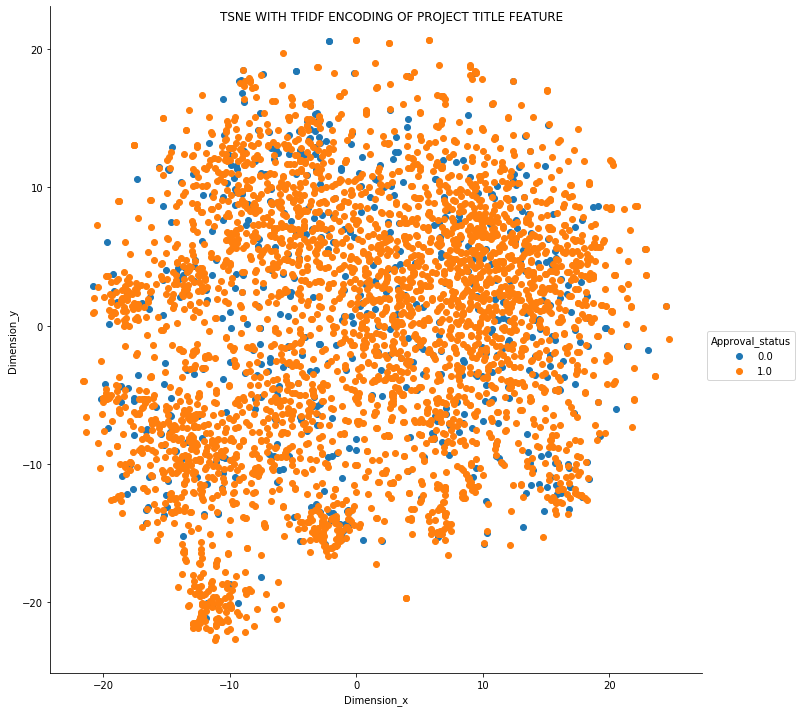

In [83]:
# https://scikit-learn.org/stable/modules/impute.html
#https://docs.scipy.org/doc/scipy/reference/sparse.html
#https://sparse.pydata.org/en/latest/generated/sparse.COO.tocsr.html

import scipy.sparse as sp
from sklearn.impute import SimpleImputer

Y_avg_w2v = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,avg_w2v_vectors_title, grade_one_hot, prefix_one_hot, sch_one_hot, previously_posted_projects_standardized))

from sklearn.manifold import TSNE

Y_avg_w2v = Y_avg_w2v.tocsr()
N3 = Y_avg_w2v[0:4000,:]
N3 = N3.toarray()

tsne = TSNE(n_components=2, perplexity=120, learning_rate=200, random_state = 0)
Y_embedding = tsne.fit_transform(N3)

t = project_data['project_is_approved']
t1=t[0:4000]
# print(type(t1))


for_tsne1 = np.vstack((Y_embedding.T, t1)).T
for_tsne1_df = pd.DataFrame(data=for_tsne1, columns=['Dimension_x','Dimension_y','Approval_status'])
sns.FacetGrid(for_tsne1_df, hue = "Approval_status", size = 10).map(plt.scatter, "Dimension_x", "Dimension_y").add_legend().fig.suptitle("TSNE WITH TFIDF ENCODING OF PROJECT TITLE FEATURE ")
plt.show()


<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

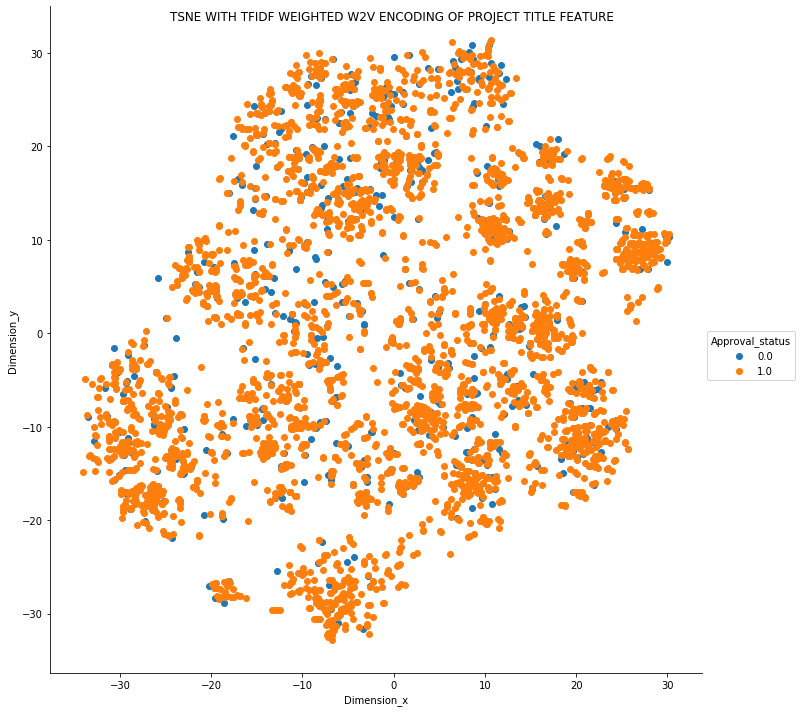

In [84]:
# https://scikit-learn.org/stable/modules/impute.html
#https://docs.scipy.org/doc/scipy/reference/sparse.html
#https://sparse.pydata.org/en/latest/generated/sparse.COO.tocsr.html

import scipy.sparse as sp
from sklearn.impute import SimpleImputer

Y_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,tfidf_w2v_vectors_title, grade_one_hot, prefix_one_hot, sch_one_hot, previously_posted_projects_standardized))
from sklearn.manifold import TSNE

Y_tfidf_w2v = Y_tfidf_w2v.tocsr()
N4 = Y_tfidf_w2v[0:4000,:]
N4 = N4.toarray()

tsne = TSNE(n_components=2, perplexity=150, learning_rate=200, random_state = 0)
Y_embedding = tsne.fit_transform(N4)

t = project_data['project_is_approved']
t1=t[0:4000]
# print(type(t1))


for_tsne1 = np.vstack((Y_embedding.T, t1)).T
for_tsne1_df = pd.DataFrame(data=for_tsne1, columns=['Dimension_x','Dimension_y','Approval_status'])
sns.FacetGrid(for_tsne1_df, hue = "Approval_status", size = 10).map(plt.scatter, "Dimension_x", "Dimension_y").add_legend().fig.suptitle("TSNE WITH TFIDF WEIGHTED W2V ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

  

**TSNE WITH BAG OF WORDS, TFIDF, AVERAGE WORD TO VECTOR, TFIDF WEIGHTED WORD TO VECTOR ENCODING OF PROJECT TITLE FEATURE.**

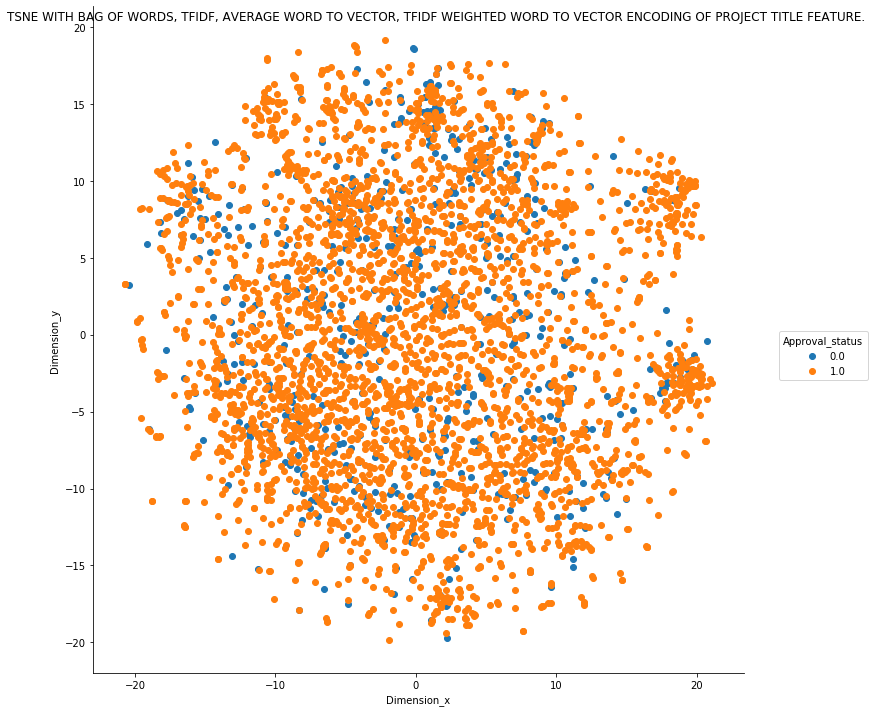

In [85]:
# https://scikit-learn.org/stable/modules/impute.html
#https://docs.scipy.org/doc/scipy/reference/sparse.html
#https://sparse.pydata.org/en/latest/generated/sparse.COO.tocsr.html

import scipy.sparse as sp
from sklearn.impute import SimpleImputer


Y_all = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, title_bow, title_tfidf, avg_w2v_vectors_title, tfidf_w2v_vectors_title, grade_one_hot, prefix_one_hot, sch_one_hot, previously_posted_projects_standardized))

from sklearn.manifold import TSNE

Y_all = Y_all.tocsr()
N5 = Y_all[0:4000,:]
N5 = N5.toarray()

tsne = TSNE(n_components=2, perplexity=170, learning_rate=200, random_state = 0)
Y_embedding = tsne.fit_transform(N5)

t = project_data['project_is_approved']
t1=t[0:4000]
# print(type(t1))


for_tsne1 = np.vstack((Y_embedding.T, t1)).T
for_tsne1_df = pd.DataFrame(data=for_tsne1, columns=['Dimension_x','Dimension_y','Approval_status'])
sns.FacetGrid(for_tsne1_df, hue = "Approval_status", size = 10).map(plt.scatter, "Dimension_x", "Dimension_y").add_legend().fig.suptitle("TSNE WITH BAG OF WORDS, TFIDF, AVERAGE WORD TO VECTOR, TFIDF WEIGHTED WORD TO VECTOR ENCODING OF PROJECT TITLE FEATURE.")
plt.show()

  

<h2> 2.5 Summary </h2>

**SUMMARY:**
After ploting the TSNE with Bag of Words, TF-IDF, Avg Word2Vec, TF-IDF Weighted
Word2Vec it does not seem to get the expected result. Most of the points are overlapping.And we dont see any unique pattern for project acception and rejection status.
Hence it make difficult to find the acceptance and rejection pattern.